<a href="https://colab.research.google.com/github/Vidhi35/ML-Projects/blob/main/Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raninetam","key":"3f78b30c40d44731e05164de6e9cc6c1"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 71% 154M/218M [00:00<00:00, 1.61GB/s]
100% 218M/218M [00:00<00:00, 960MB/s] 


In [4]:
!unzip cat-and-dog.zip -d cat_dog_dataset


Streaming output truncated to the last 5000 lines.
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat_dog_dataset/training_set/training

In [5]:
!ls cat_dog_dataset


test_set  training_set


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat_dog_dataset/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat_dog_dataset/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [8]:
# Normalize
def process(img,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train.ds.map(process)
  validation_ds = validation_ds.map(process)



In [9]:
# create  CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 120ms/step - accuracy: 0.5463 - loss: 3.4898 - val_accuracy: 0.6169 - val_loss: 0.7858
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.5940 - loss: 0.8325 - val_accuracy: 0.6149 - val_loss: 0.7030
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.6416 - loss: 0.6744 - val_accuracy: 0.6614 - val_loss: 0.6134
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7090 - loss: 0.5645 - val_accuracy: 0.7252 - val_loss: 0.5667
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7460 - loss: 0.5152 - val_accuracy: 0.7271 - val_loss: 0.5364
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7862 - loss: 0.4429 - val_accuracy: 0.7286 - val_loss: 0.6199
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8111 - loss: 0.4066 - val_accuracy: 0.7652 - val_loss: 0.5074
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.8420 - loss: 0.3553 -

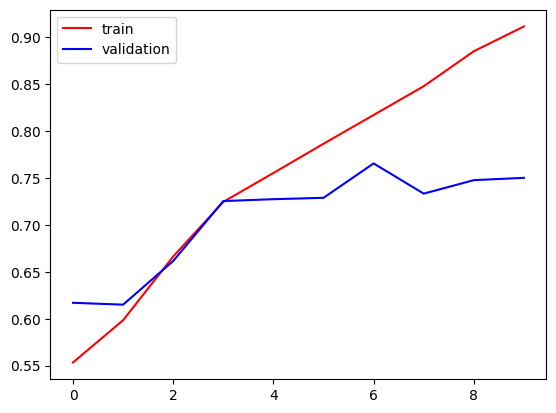

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

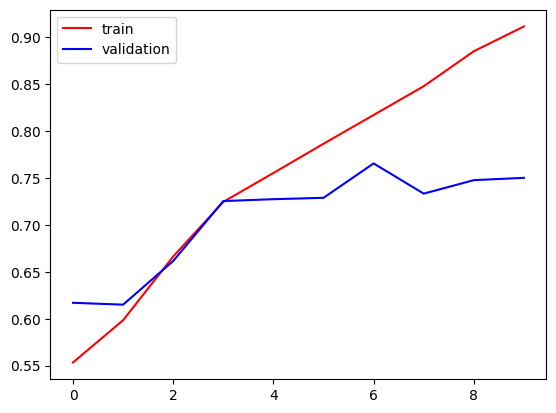

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [22]:
test_img = cv2.imread('/content/images (1).jpeg')

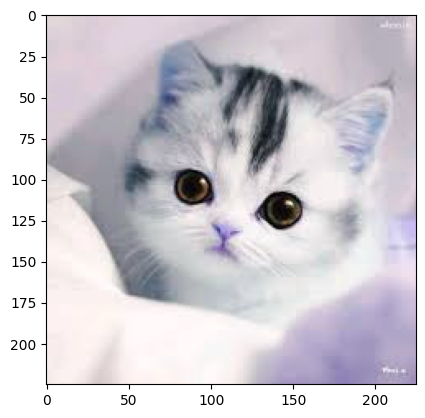

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(225, 225, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.11850569]], dtype=float32)